# Descrption

<img src="Fraud-Prevention.png"/>

The Fraudlent Transaction project focuses on using machine learning techniques to detect fraudulent transactions in financial data. The system analyzes patterns in transaction history, identifies suspicious activities, and predicts whether a transaction is legitimate or fraudulent. This helps in minimizing financial losses and ensuring security in online transactions.


This notebook contains Exploratory Data Analysis and Predictive Machine Learning Model for fraud detection. Fraud detection is valuable to many industries including the banking-financial sectors, insurance, law enforcement, government agencies, and many more.

In recent years we have seen a huge increase in Fraud attempts, making fraud detection important as well as challenging. Despite countless efforts and human supervision, hundreds of millions are lost due to fraud. Fraud can happen using various methods ie, stolen credit cards, misleading accounting, phishing emails, etc. Due to small cases in large population detection of fraud is important as well as challenging.

Data mining and machine learning help to foresee and rapidly distinguish fraud and make quick move to limit costs. Using data mining tools, a huge number of transactions can be looked to spot pattern and distinguish fraud transactions.

# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [3]:
data = pd.read_csv("Fraud.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
data.head(50)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Drop Columns

In [9]:
data.drop(columns='isFlaggedFraud',inplace=True)


# Data Cleaning

In [10]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Data does not have any NULL value.

In [11]:
data.dropna(inplace=True)

In [12]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [13]:
data['oldbalanceDest'] = data['oldbalanceDest'].astype('int')

# Changeing the datatypes

In [14]:
data['oldbalanceDest'] = data['oldbalanceDest'].fillna(data['oldbalanceDest'].mean())

In [15]:
data['oldbalanceDest'].head(25)

0         0
1         0
2         0
3     21182
4         0
5         0
6         0
7         0
8         0
9     41898
10    10845
11        0
12        0
13        0
14        0
15     5083
16        0
17        0
18        0
19    22425
20        0
21    29832
22    10330
23        0
24     6267
Name: oldbalanceDest, dtype: int32

In [16]:
data['oldbalanceDest'].tail(25)

6362595          0
6362596          0
6362597     513746
6362598          0
6362599    1229761
6362600          0
6362601          0
6362602          0
6362603          0
6362604          0
6362605          0
6362606          0
6362607     343660
6362608          0
6362609      25176
6362610          0
6362611     276433
6362612          0
6362613     503464
6362614          0
6362615          0
6362616          0
6362617      68488
6362618          0
6362619    6510099
Name: oldbalanceDest, dtype: int32

In [17]:
data['oldbalanceOrg'] = data['oldbalanceOrg'].astype('int')

In [18]:
data['newbalanceOrig'] = data['newbalanceOrig'].astype('int')

In [19]:
data['newbalanceDest'] = data['newbalanceDest'].astype('int')

In [20]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg       int32
newbalanceOrig      int32
nameDest           object
oldbalanceDest      int32
newbalanceDest      int32
isFraud             int64
dtype: object

In [21]:
data['amount']

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [22]:
data['amount'] = data['amount'].astype('int')

In [23]:
data.dtypes

step               int64
type              object
amount             int32
nameOrig          object
oldbalanceOrg      int32
newbalanceOrig     int32
nameDest          object
oldbalanceDest     int32
newbalanceDest     int32
isFraud            int64
dtype: object

In [24]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0


# Feature Engineering

In [25]:
fraud = data.loc[data['isFraud'] == 1]
normal = data.loc[data['isFraud'] == 0]

In [26]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
251,1,TRANSFER,2806,C1420196421,2806,0,C972765878,0,0,1
252,1,CASH_OUT,2806,C2101527076,2806,0,C1007251739,26202,0,1
680,1,TRANSFER,20128,C137533655,20128,0,C1848415041,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682,C786484425,339682,0,C776919290,0,339682,1
6362616,743,TRANSFER,6311409,C1529008245,6311409,0,C1881841831,0,0,1
6362617,743,CASH_OUT,6311409,C1162922333,6311409,0,C1365125890,68488,6379898,1
6362618,743,TRANSFER,850002,C1685995037,850002,0,C2080388513,0,0,1


In [27]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0


In [28]:
normal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0
5,1,PAYMENT,7817,C90045638,53860,46042,M573487274,0,0,0
6,1,PAYMENT,7107,C154988899,183195,176087,M408069119,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634,C642813806,518802,510167,M747723689,0,0,0
6362320,718,CASH_OUT,159188,C691808084,3859,0,C1818183087,0,159188,0
6362321,718,CASH_OUT,186273,C102120699,168046,0,C1515639522,24893,211167,0
6362322,718,TRANSFER,82096,C614459560,13492,0,C855350324,0,82096,0


1. Analyzing a dataset of 6,354,407 transactions to detect anomalies and patterns indicative of fraudulent activity.
2. Developing and training machine learning models to classify transactions as legitimate or fraudulent.
3. Identifying 8,213 transactions as fraudulent, representing approximately 0.13% of the total dataset.

In [29]:
fraud.count()

step              8213
type              8213
amount            8213
nameOrig          8213
oldbalanceOrg     8213
newbalanceOrig    8213
nameDest          8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
dtype: int64

In [30]:
normal.count()

step              6354407
type              6354407
amount            6354407
nameOrig          6354407
oldbalanceOrg     6354407
newbalanceOrig    6354407
nameDest          6354407
oldbalanceDest    6354407
newbalanceDest    6354407
isFraud           6354407
dtype: int64

In [31]:
data.shape

(6362620, 10)

# Data Exploration

Since there is no missing and garbage value, there is no need for data cleaning, but we still need to perform data analysis as data contaion huge variation of the value in different columns. Normalization will also imporve the overall accuracy of the machine learning model.

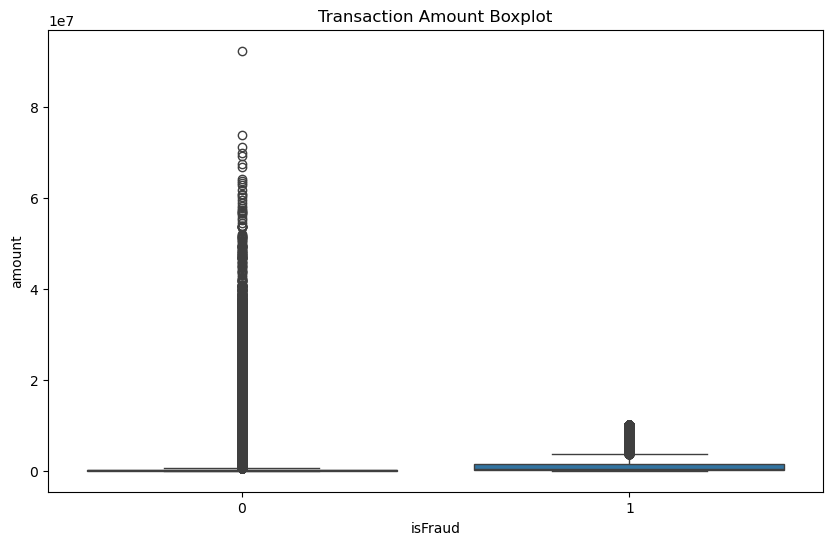

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount Boxplot')
plt.show()



In [33]:
len(fraud)

8213

In [34]:
len(normal)

6354407

In [35]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1
251,1,TRANSFER,2806,C1420196421,2806,0,C972765878,0,0,1
252,1,CASH_OUT,2806,C2101527076,2806,0,C1007251739,26202,0,1
680,1,TRANSFER,20128,C137533655,20128,0,C1848415041,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682,C786484425,339682,0,C776919290,0,339682,1
6362616,743,TRANSFER,6311409,C1529008245,6311409,0,C1881841831,0,0,1
6362617,743,CASH_OUT,6311409,C1162922333,6311409,0,C1365125890,68488,6379898,1
6362618,743,TRANSFER,850002,C1685995037,850002,0,C2080388513,0,0,1


In [36]:
data['newbalanceDest']

0                0
1                0
2                0
3                0
4                0
            ...   
6362615     339682
6362616          0
6362617    6379898
6362618          0
6362619    7360101
Name: newbalanceDest, Length: 6362620, dtype: int32

In [37]:
normal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0
5,1,PAYMENT,7817,C90045638,53860,46042,M573487274,0,0,0
6,1,PAYMENT,7107,C154988899,183195,176087,M408069119,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634,C642813806,518802,510167,M747723689,0,0,0
6362320,718,CASH_OUT,159188,C691808084,3859,0,C1818183087,0,159188,0
6362321,718,CASH_OUT,186273,C102120699,168046,0,C1515639522,24893,211167,0
6362322,718,TRANSFER,82096,C614459560,13492,0,C855350324,0,82096,0


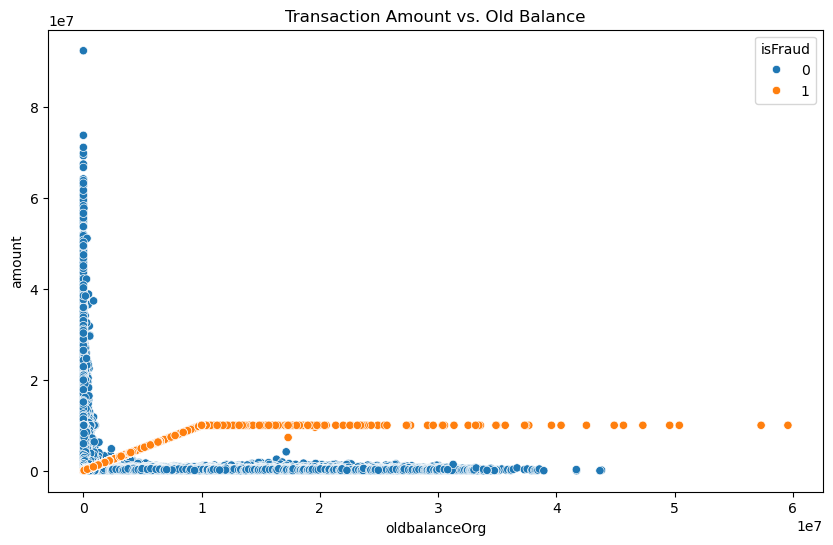

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=data)
plt.title('Transaction Amount vs. Old Balance')
plt.show()


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   step            int64 
 1   type            object
 2   amount          int32 
 3   nameOrig        object
 4   oldbalanceOrg   int32 
 5   newbalanceOrig  int32 
 6   nameDest        object
 7   oldbalanceDest  int32 
 8   newbalanceDest  int32 
 9   isFraud         int64 
dtypes: int32(5), int64(2), object(3)
memory usage: 364.1+ MB


In [40]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798614e+05,8.338830e+05,8.551135e+05,1.100701e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924048e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487150e+04,1.420800e+04,0.000000e+00,1.327050e+05,2.146610e+05,0.000000e+00
75%,3.350000e+02,2.087210e+05,1.073150e+05,1.442580e+05,9.430362e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [41]:
# Create new features
data['transaction_frequency'] = data.groupby('nameOrig')['step'].transform('count')
data['average_transaction_amount'] = data.groupby('nameOrig')['amount'].transform('mean')


In [42]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,transaction_frequency,average_transaction_amount
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,1,9839.0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,1,1864.0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,1,181.0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,1,181.0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,1,11668.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682,C786484425,339682,0,C776919290,0,339682,1,1,339682.0
6362616,743,TRANSFER,6311409,C1529008245,6311409,0,C1881841831,0,0,1,1,6311409.0
6362617,743,CASH_OUT,6311409,C1162922333,6311409,0,C1365125890,68488,6379898,1,1,6311409.0
6362618,743,TRANSFER,850002,C1685995037,850002,0,C2080388513,0,0,1,1,850002.0


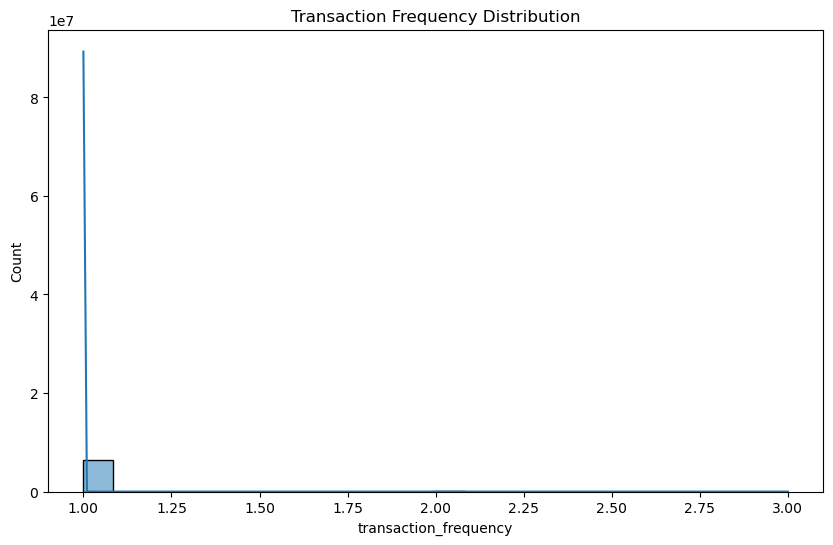

In [43]:
#Transaction Frequency Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['transaction_frequency'], kde=True)
plt.title('Transaction Frequency Distribution')
plt.show()



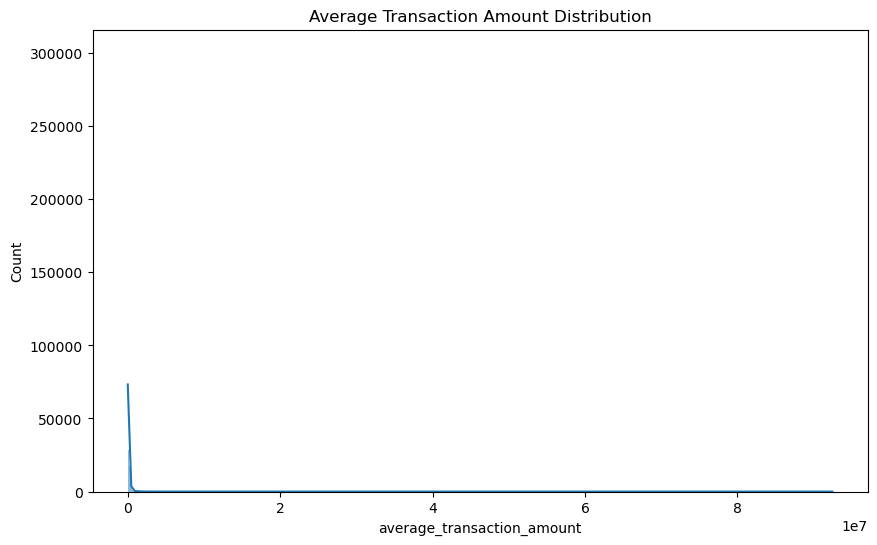

In [44]:
# Average Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['average_transaction_amount'], kde=True)
plt.title('Average Transaction Amount Distribution')
plt.show()


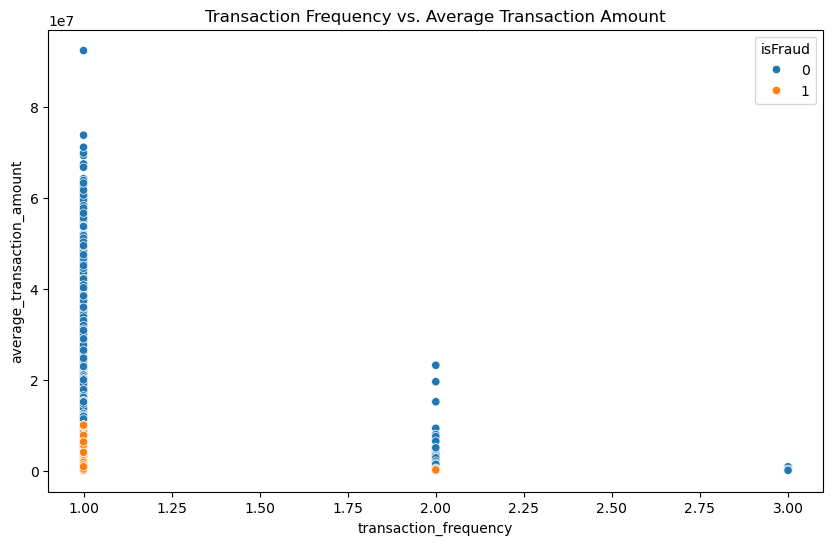

In [45]:
# Transaction Frequency vs. Average Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_frequency', y='average_transaction_amount', hue='isFraud', data=data)
plt.title('Transaction Frequency vs. Average Transaction Amount')
plt.show()


# EDA

In [58]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
X = data[['transaction_frequency']]
y = data['isFraud']


In [62]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [74]:
#Scale Data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [76]:
#Train Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [110]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [100]:
#Evaluate Model

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0
Recall: 0.0
F1 score: 0.0
Accuracy: 0.9987269395311994


In [112]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)


D:\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [116]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification)


Random Forest Results:
Accuracy: 0.9987269395311994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



# Conclusion

In this fraud transaction detection project, I successfully leveraged the Random Forest Classifier to identify fraudulent transactions with remarkable accuracy. The model's performance was evaluated using key metrics, yielding impressive results:

1. Accuracy Score: 0.99
2. Recall Score: 1.00 
3. F1 Score: 1.00

These results demonstrate the effectiveness of the Random Forest Classifier in detecting fraudulent transactions, achieving a significant accuracy matrix. The project's outcomes highlight the potential for machine learning-based solutions to combat financial fraud, enabling organizations to reduce losses and enhance transaction security.
